## Mapping supplemental data from deck 704 to a CDM

This guide is a follow up from the [mdf_reader()](https://git.noc.ac.uk/brecinosrivas/mdf_reader/-/tree/master/) python tool [notebooks](https://git.noc.ac.uk/brecinosrivas/mdf_reader/-/tree/master/docs/notebooks). Where we extracted supplemental metadata from [ICOADSv3.0](https://icoads.noaa.gov/r3.html) stored in the [IMMA](https://icoads.noaa.gov/e-doc/imma/R3.0-imma1.pdf) format. 
Now we will map this supplemental data to a Common Data Model (CDM) format defined in the following [documentation](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/blob/master/docs/cdm_latest.pdf).

This is done by using the [cdm-mapper python tool from the branch deck704v0](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/tree/deck704v0) and following the workflow explained below. 

Along this notebook we will also point out Issues found in the cdm-mapper code and the cdm docs. This issues need to be address in the case that we want to map certain variables to the cdm.

We are analysing deck: `704`, the [US Marine Meteorological Journals Collection](https://icoads.noaa.gov/usmmj.html)

In [1]:
import os
import sys
MAIN_PATH = '/Users/brivas/c3s_work'
sys.path.append(MAIN_PATH)
import cdm
import json
import pandas as pd
import mdf_reader

/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
2021-01-26 14:55:50,077 - numba.core.byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=139)
           2	LOAD_CONST(arg=1, lineno=139)
           4	STORE_FAST(arg=3, lineno=139)
           6	LOAD_GLOBAL(arg=0, lineno=141)
           8	LOAD_ATTR(arg=1, lineno=141)
          10	LOAD_FAST(arg=1, lineno=141)
          12	LOAD_FAST(arg=2, lineno=141)
          14	BUILD_LIST(arg=2, lineno=141)
          16	LOAD_GLOBAL(arg=0, lineno=141)
          18	LOAD_ATTR(arg=2, lineno=141)
          20	LOAD_CONST(arg=2, lineno=141)
          22	CALL_FUNCTION_KW(arg=2, lineno=141)
          24	STORE_FAST(arg=1, lineno=141)
          26	LOAD_CONST(arg=3, lineno=143)
          28	LOAD_FAST(arg=0, lin

2021-01-26 14:55:50,084 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:50,085 - numba.core.byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=3, lineno=139)
2021-01-26 14:55:50,085 - numba.core.byteflow - DEBUG - stack ['$const2.0']
2021-01-26 14:55:50,086 - numba.core.byteflow - DEBUG - dispatch pc=6, inst=LOAD_GLOBAL(arg=0, lineno=141)
2021-01-26 14:55:50,086 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:50,087 - numba.core.byteflow - DEBUG - dispatch pc=8, inst=LOAD_ATTR(arg=1, lineno=141)
2021-01-26 14:55:50,088 - numba.core.byteflow - DEBUG - stack ['$6load_global.1']
2021-01-26 14:55:50,088 - numba.core.byteflow - DEBUG - dispatch pc=10, inst=LOAD_FAST(arg=1, lineno=141)
2021-01-26 14:55:50,089 - numba.core.byteflow - DEBUG - stack ['$8load_attr.2']
2021-01-26 14:55:50,090 - numba.core.byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=2, lineno=141)
2021-01-26 14:55:50,091 - numba.core.byteflow - DEBUG - stack ['$8load_attr.2', '$x10.3']
2021-01-26 1

2021-01-26 14:55:50,158 - numba.core.byteflow - DEBUG - dispatch pc=66, inst=CALL_FUNCTION(arg=1, lineno=149)
2021-01-26 14:55:50,159 - numba.core.byteflow - DEBUG - stack ['$62load_global.0', '$n64.1']
2021-01-26 14:55:50,160 - numba.core.byteflow - DEBUG - dispatch pc=68, inst=GET_ITER(arg=None, lineno=149)
2021-01-26 14:55:50,161 - numba.core.byteflow - DEBUG - stack ['$66call_function.2']
2021-01-26 14:55:50,163 - numba.core.byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=('$68get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 172, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 160, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]
2021-01-26 14:55:50,164 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=172 nstack_initial=0), State(pc_initial=70 nstack_initial=1)])
2021-01-26 14:55:50,165 - numba.core.byteflow - DEBUG - stack: []
2021-01-26 14:55:50,166 - numba.core.byteflow - DEBUG - dispatch pc

2021-01-26 14:55:50,209 - numba.core.byteflow - DEBUG - stack ['$phi186.0', '$phi186.1']
2021-01-26 14:55:50,210 - numba.core.byteflow - DEBUG - dispatch pc=188, inst=LOAD_FAST(arg=1, lineno=160)
2021-01-26 14:55:50,211 - numba.core.byteflow - DEBUG - stack ['$phi186.0']
2021-01-26 14:55:50,212 - numba.core.byteflow - DEBUG - dispatch pc=190, inst=LOAD_FAST(arg=7, lineno=160)
2021-01-26 14:55:50,213 - numba.core.byteflow - DEBUG - stack ['$phi186.0', '$x188.2']
2021-01-26 14:55:50,215 - numba.core.byteflow - DEBUG - dispatch pc=192, inst=DUP_TOP_TWO(arg=None, lineno=160)
2021-01-26 14:55:50,216 - numba.core.byteflow - DEBUG - stack ['$phi186.0', '$x188.2', '$i190.3']
2021-01-26 14:55:50,217 - numba.core.byteflow - DEBUG - dispatch pc=194, inst=BINARY_SUBSCR(arg=None, lineno=160)
2021-01-26 14:55:50,218 - numba.core.byteflow - DEBUG - stack ['$phi186.0', '$x188.2', '$i190.3', '$192dup_top_two.4', '$192dup_top_two.5']
2021-01-26 14:55:50,219 - numba.core.byteflow - DEBUG - dispatch pc=19

2021-01-26 14:55:50,272 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$x104.1', '$const106.2']
2021-01-26 14:55:50,273 - numba.core.byteflow - DEBUG - dispatch pc=110, inst=LOAD_FAST(arg=1, lineno=153)
2021-01-26 14:55:50,273 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$108binary_subscr.3']
2021-01-26 14:55:50,274 - numba.core.byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=7, lineno=153)
2021-01-26 14:55:50,275 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$108binary_subscr.3', '$x110.4']
2021-01-26 14:55:50,276 - numba.core.byteflow - DEBUG - dispatch pc=114, inst=BINARY_SUBSCR(arg=None, lineno=153)
2021-01-26 14:55:50,277 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$108binary_subscr.3', '$x110.4', '$i112.5']
2021-01-26 14:55:50,277 - numba.core.byteflow - DEBUG - dispatch pc=116, inst=BINARY_XOR(arg=None, lineno=153)
2021-01-26 14:55:50,278 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$108binary_subscr.3', '$114binary_subscr.6']
2021-01

2021-01-26 14:55:50,325 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=226 nstack_initial=0)])
2021-01-26 14:55:50,326 - numba.core.byteflow - DEBUG - stack: []
2021-01-26 14:55:50,326 - numba.core.byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=5, lineno=163)
2021-01-26 14:55:50,327 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:50,328 - numba.core.byteflow - DEBUG - dispatch pc=228, inst=LOAD_CONST(arg=3, lineno=163)
2021-01-26 14:55:50,328 - numba.core.byteflow - DEBUG - stack ['$Q226.0']
2021-01-26 14:55:50,329 - numba.core.byteflow - DEBUG - dispatch pc=230, inst=COMPARE_OP(arg=4, lineno=163)
2021-01-26 14:55:50,329 - numba.core.byteflow - DEBUG - stack ['$Q226.0', '$const228.1']
2021-01-26 14:55:50,330 - numba.core.byteflow - DEBUG - dispatch pc=232, inst=POP_JUMP_IF_FALSE(arg=276, lineno=163)
2021-01-26 14:55:50,331 - numba.core.byteflow - DEBUG - stack ['$230compare_op.2']
2021-01-26 14:55:50,331 - numba.core.byteflow - DEBUG - end state. edg

2021-01-26 14:55:50,396 - numba.core.byteflow - DEBUG - end state. edges=[Edge(pc=288, stack=('$286get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 314, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
2021-01-26 14:55:50,397 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=266 nstack_initial=0), State(pc_initial=226 nstack_initial=0), State(pc_initial=288 nstack_initial=1)])
2021-01-26 14:55:50,398 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=226 nstack_initial=0), State(pc_initial=288 nstack_initial=1)])
2021-01-26 14:55:50,399 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=288 nstack_initial=1)])
2021-01-26 14:55:50,400 - numba.core.byteflow - DEBUG - stack: ['$phi288.0']
2021-01-26 14:55:50,401 - numba.core.byteflow - DEBUG - dispatch pc=288, inst=FOR_ITER(arg=22, lineno=167)
2021-01-26 14:55:50,401 - numba.core.byteflow - DEBUG - stack ['$phi288.0']
2021-01-26 14:55:50,402 - numba.core.byteflow - DEB

2021-01-26 14:55:50,448 - numba.core.byteflow - DEBUG - defmap: {'$phi184.0': State(pc_initial=172 nstack_initial=0),
 '$phi186.1': State(pc_initial=184 nstack_initial=1),
 '$phi288.0': State(pc_initial=278 nstack_initial=0),
 '$phi290.1': State(pc_initial=288 nstack_initial=1),
 '$phi70.0': State(pc_initial=60 nstack_initial=0),
 '$phi72.1': State(pc_initial=70 nstack_initial=1)}
2021-01-26 14:55:50,449 - numba.core.byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi104.0': {('$phi72.0', State(pc_initial=72 nstack_initial=2))},
             '$phi184.0': {('$182get_iter.4',
                            State(pc_initial=172 nstack_initial=0)),
                           ('$phi186.0',
                            State(pc_initial=186 nstack_initial=2))},
             '$phi186.0': {('$phi184.0',
                            State(pc_initial=184 nstack_initial=1))},
             '$phi186.1': {('$184for_iter.2',
                            State(pc_initial=184 nstack_init

2021-01-26 14:55:50,455 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={44: ()})
2021-01-26 14:55:50,456 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$Q44.0'}), (46, {'res': '$const46.1'}), (48, {'lhs': '$Q44.0', 'rhs': '$const46.1', 'res': '$48compare_op.2'}), (50, {'pred': '$48compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 172, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={52: (), 170: ()})
2021-01-26 14:55:50,456 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=0):
AdaptBlockInfo(insts=((52, {'res': '$Q52.0'}), (54, {'res': '$const54.1'}), (56, {'lhs': '$Q52.0', 'rhs': '$const54.1', 'res': '$56binary_subtract.2'}), (58, {'value': '$56binary_subtract.2'})), out

2021-01-26 14:55:50,464 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=214 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 216, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={216: ()})
2021-01-26 14:55:50,464 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=216 nstack_initial=0):
AdaptBlockInfo(insts=((216, {'res': '$const216.0'}), (218, {'value': '$const216.0'}), (220, {'res': '$M220.1'}), (222, {'value': '$M220.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={224: ()})
2021-01-26 14:55:50,465 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=224 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={226: ()})
2021-01-26 14:55:50,465 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=226 nstack_initial=0):
AdaptBlockInfo(insts=((

2021-01-26 14:55:50,500 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 0
2021-01-26 14:55:50,501 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x13ddf22e8>
2021-01-26 14:55:50,502 - numba.core.ssa - DEBUG - on stmt: p = arg(0, name=p)
2021-01-26 14:55:50,503 - numba.core.ssa - DEBUG - on stmt: x = arg(1, name=x)
2021-01-26 14:55:50,503 - numba.core.ssa - DEBUG - on stmt: y = arg(2, name=y)
2021-01-26 14:55:50,504 - numba.core.ssa - DEBUG - on stmt: $const2.0 = const(int, 2)
2021-01-26 14:55:50,504 - numba.core.ssa - DEBUG - on stmt: n = $const2.0
2021-01-26 14:55:50,504 - numba.core.ssa - DEBUG - on stmt: $6load_global.1 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-26 14:55:50,505 - numba.core.ssa - DEBUG - on stmt: $8load_attr.2 = getattr(value=$6load_global.1, attr=array)
2021-01-26 14:55:50,506 - numba.core.ssa - DEBUG - on stmt: $14build_list

2021-01-26 14:55:50,597 - numba.core.ssa - DEBUG - on stmt: $134inplace_xor.16 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$130binary_subscr.14, rhs=t, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:50,597 - numba.core.ssa - DEBUG - on stmt: x.1[0] = $134inplace_xor.16
2021-01-26 14:55:50,598 - numba.core.ssa - DEBUG - on stmt: $146binary_subscr.21 = getitem(value=x.1, index=i, fn=<built-in function getitem>)
2021-01-26 14:55:50,598 - numba.core.ssa - DEBUG - on stmt: $150inplace_xor.23 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$146binary_subscr.21, rhs=t, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:50,599 - numba.core.ssa - DEBUG - on stmt: x.1[i] = $150inplace_xor.23
2021-01-26 14:55:50,599 - numba.core.ssa - DEBUG - on stmt: jump 315
2021-01-26 14:55:50,600 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 158
2021-01-26 14:55:50,601 - numba.core.ssa - DEBU

2021-01-26 14:55:50,633 - numba.core.ssa - DEBUG - on stmt: t.1 = $262inplace_xor.4
2021-01-26 14:55:50,634 - numba.core.ssa - DEBUG - on stmt: jump 266
2021-01-26 14:55:50,634 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 266
2021-01-26 14:55:50,634 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x13ddf22e8>
2021-01-26 14:55:50,635 - numba.core.ssa - DEBUG - on stmt: $const268.1 = const(int, 1)
2021-01-26 14:55:50,635 - numba.core.ssa - DEBUG - on stmt: $270inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=Q.1, rhs=$const268.1, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:50,636 - numba.core.ssa - DEBUG - on stmt: Q.1 = $270inplace_rshift.2
2021-01-26 14:55:50,636 - numba.core.ssa - DEBUG - on stmt: jump 226
2021-01-26 14:55:50,637 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 276
2021-01-26 14:55:50,637 - numba.core.ssa - DEBUG - Running <numba.core.s

2021-01-26 14:55:50,663 - numba.core.ssa - DEBUG - SSA violators {'i', 'Q', 't.1', 'Q.1'}
2021-01-26 14:55:50,664 - numba.core.ssa - DEBUG - Fix SSA violator on var i
2021-01-26 14:55:50,664 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 0
2021-01-26 14:55:50,665 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13ddcdbe0>
2021-01-26 14:55:50,665 - numba.core.ssa - DEBUG - on stmt: p = arg(0, name=p)
2021-01-26 14:55:50,666 - numba.core.ssa - DEBUG - on stmt: x = arg(1, name=x)
2021-01-26 14:55:50,667 - numba.core.ssa - DEBUG - on stmt: y = arg(2, name=y)
2021-01-26 14:55:50,667 - numba.core.ssa - DEBUG - on stmt: $const2.0 = const(int, 2)
2021-01-26 14:55:50,668 - numba.core.ssa - DEBUG - on stmt: n = $const2.0
2021-01-26 14:55:50,668 - numba.core.ssa - DEBUG - on stmt: $6load_global.1 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-26 14:55:50,669 - nu

2021-01-26 14:55:50,702 - numba.core.ssa - DEBUG - on stmt: t = $120binary_and.9
2021-01-26 14:55:50,702 - numba.core.ssa - DEBUG - on stmt: $const126.11 = const(int, 0)
2021-01-26 14:55:50,703 - numba.core.ssa - DEBUG - on stmt: $130binary_subscr.14 = static_getitem(value=x.1, index=0, index_var=$const126.11, fn=<built-in function getitem>)
2021-01-26 14:55:50,703 - numba.core.ssa - DEBUG - on stmt: $134inplace_xor.16 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$130binary_subscr.14, rhs=t, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:50,776 - numba.core.ssa - DEBUG - on stmt: x.1[0] = $134inplace_xor.16
2021-01-26 14:55:50,776 - numba.core.ssa - DEBUG - on stmt: $146binary_subscr.21 = getitem(value=x.1, index=i, fn=<built-in function getitem>)
2021-01-26 14:55:50,777 - numba.core.ssa - DEBUG - on stmt: $150inplace_xor.23 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$146binary_subscr.21

2021-01-26 14:55:50,815 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13ddcdbe0>
2021-01-26 14:55:50,815 - numba.core.ssa - DEBUG - on stmt: $const258.2 = const(int, 1)
2021-01-26 14:55:50,815 - numba.core.ssa - DEBUG - on stmt: $260binary_subtract.3 = Q.1 - $const258.2
2021-01-26 14:55:50,816 - numba.core.ssa - DEBUG - on stmt: $262inplace_xor.4 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=t.1, rhs=$260binary_subtract.3, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:50,816 - numba.core.ssa - DEBUG - on stmt: t.1 = $262inplace_xor.4
2021-01-26 14:55:50,817 - numba.core.ssa - DEBUG - on stmt: jump 266
2021-01-26 14:55:50,817 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 266
2021-01-26 14:55:50,818 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13ddcdbe0>
2021-01-26 14:55:50,818 - numba.core.ssa - DEBUG - on stmt: $const268.1 = const(int, 1)
2021-01-26 1

2021-01-26 14:55:50,855 - numba.core.ssa - DEBUG - on stmt: $const30.12 = const(int, 1)
2021-01-26 14:55:50,856 - numba.core.ssa - DEBUG - on stmt: $32binary_subtract.13 = p - $const30.12
2021-01-26 14:55:50,856 - numba.core.ssa - DEBUG - on stmt: $34binary_lshift.14 = $const26.10 << $32binary_subtract.13
2021-01-26 14:55:50,857 - numba.core.ssa - DEBUG - on stmt: M = $34binary_lshift.14
2021-01-26 14:55:50,857 - numba.core.ssa - DEBUG - on stmt: Q = M
2021-01-26 14:55:50,858 - numba.core.ssa - DEBUG - on stmt: jump 42
2021-01-26 14:55:50,858 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 42
2021-01-26 14:55:50,858 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61b00>
2021-01-26 14:55:50,859 - numba.core.ssa - DEBUG - on stmt: jump 44
2021-01-26 14:55:50,859 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 44
2021-01-26 14:55:50,860 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61b00>
2021-01-26 14:55:

2021-01-26 14:55:50,896 - numba.core.ssa - DEBUG - find_def_from_top label 104
2021-01-26 14:55:50,896 - numba.core.ssa - DEBUG - idom 72 from label 104
2021-01-26 14:55:50,897 - numba.core.ssa - DEBUG - find_def_from_bottom label 72
2021-01-26 14:55:50,897 - numba.core.ssa - DEBUG - on stmt: jump 315
2021-01-26 14:55:50,898 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 158
2021-01-26 14:55:50,898 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61b00>
2021-01-26 14:55:50,899 - numba.core.ssa - DEBUG - on stmt: jump 160
2021-01-26 14:55:50,899 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 160
2021-01-26 14:55:50,900 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61b00>
2021-01-26 14:55:50,900 - numba.core.ssa - DEBUG - on stmt: $const162.1 = const(int, 1)
2021-01-26 14:55:50,901 - numba.core.ssa - DEBUG - on stmt: $164inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built

2021-01-26 14:55:51,012 - numba.core.ssa - DEBUG - on stmt: $262inplace_xor.4 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=t.1, rhs=$260binary_subtract.3, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:51,013 - numba.core.ssa - DEBUG - on stmt: t.1 = $262inplace_xor.4
2021-01-26 14:55:51,013 - numba.core.ssa - DEBUG - on stmt: jump 266
2021-01-26 14:55:51,014 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 266
2021-01-26 14:55:51,014 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61b00>
2021-01-26 14:55:51,015 - numba.core.ssa - DEBUG - on stmt: $const268.1 = const(int, 1)
2021-01-26 14:55:51,015 - numba.core.ssa - DEBUG - on stmt: $270inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=Q.1, rhs=$const268.1, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:51,016 - numba.core.ssa - DEBUG - on stmt: Q.1 = $270inplace_rshi

2021-01-26 14:55:51,053 - numba.core.ssa - DEBUG - on stmt: $34binary_lshift.14 = $const26.10 << $32binary_subtract.13
2021-01-26 14:55:51,053 - numba.core.ssa - DEBUG - on stmt: M = $34binary_lshift.14
2021-01-26 14:55:51,054 - numba.core.ssa - DEBUG - on stmt: Q = M
2021-01-26 14:55:51,054 - numba.core.ssa - DEBUG - first assign: Q
2021-01-26 14:55:51,055 - numba.core.ssa - DEBUG - replaced with: Q = M
2021-01-26 14:55:51,055 - numba.core.ssa - DEBUG - on stmt: jump 42
2021-01-26 14:55:51,056 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 42
2021-01-26 14:55:51,057 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13de1d240>
2021-01-26 14:55:51,058 - numba.core.ssa - DEBUG - on stmt: jump 44
2021-01-26 14:55:51,059 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 44
2021-01-26 14:55:51,060 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13de1d240>
2021-01-26 14:55:51,061 - numba.core.ssa - DEBUG - on st

2021-01-26 14:55:51,133 - numba.core.ssa - DEBUG - on stmt: jump 44
2021-01-26 14:55:51,133 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 170
2021-01-26 14:55:51,134 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13de1d240>
2021-01-26 14:55:51,134 - numba.core.ssa - DEBUG - on stmt: jump 172
2021-01-26 14:55:51,135 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 172
2021-01-26 14:55:51,135 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13de1d240>
2021-01-26 14:55:51,136 - numba.core.ssa - DEBUG - on stmt: $174load_global.0 = global(range: <class 'range'>)
2021-01-26 14:55:51,137 - numba.core.ssa - DEBUG - on stmt: $const176.1 = const(int, 1)
2021-01-26 14:55:51,137 - numba.core.ssa - DEBUG - on stmt: $180call_function.3 = call $174load_global.0($const176.1, n, func=$174load_global.0, args=[Var($const176.1, hilbert_curve.py:159), Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-26 14:55:51

2021-01-26 14:55:51,217 - numba.core.ssa - DEBUG - on stmt: $286get_iter.3 = getiter(value=$284call_function.2)
2021-01-26 14:55:51,217 - numba.core.ssa - DEBUG - on stmt: $phi288.0 = $286get_iter.3
2021-01-26 14:55:51,218 - numba.core.ssa - DEBUG - on stmt: jump 288
2021-01-26 14:55:51,218 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 288
2021-01-26 14:55:51,219 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13de1d240>
2021-01-26 14:55:51,222 - numba.core.ssa - DEBUG - on stmt: $288for_iter.1 = iternext(value=$phi288.0)
2021-01-26 14:55:51,225 - numba.core.ssa - DEBUG - on stmt: $288for_iter.2 = pair_first(value=$288for_iter.1)
2021-01-26 14:55:51,226 - numba.core.ssa - DEBUG - on stmt: $288for_iter.3 = pair_second(value=$288for_iter.1)
2021-01-26 14:55:51,230 - numba.core.ssa - DEBUG - on stmt: $phi290.1 = $288for_iter.2
2021-01-26 14:55:51,233 - numba.core.ssa - DEBUG - on stmt: branch $288for_iter.3, 290, 312
2021-01-26 14:55:51,233 - nu

2021-01-26 14:55:51,303 - numba.core.ssa - DEBUG - on stmt: branch $50pred, 52, 170
2021-01-26 14:55:51,304 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 52
2021-01-26 14:55:51,304 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de612e8>
2021-01-26 14:55:51,305 - numba.core.ssa - DEBUG - on stmt: $const54.1 = const(int, 1)
2021-01-26 14:55:51,305 - numba.core.ssa - DEBUG - on stmt: $56binary_subtract.2 = Q - $const54.1
2021-01-26 14:55:51,306 - numba.core.ssa - DEBUG - find_def var='Q' stmt=$56binary_subtract.2 = Q - $const54.1
2021-01-26 14:55:51,306 - numba.core.ssa - DEBUG - find_def_from_top label 52
2021-01-26 14:55:51,307 - numba.core.ssa - DEBUG - idom 44 from label 52
2021-01-26 14:55:51,307 - numba.core.ssa - DEBUG - find_def_from_bottom label 44
2021-01-26 14:55:51,308 - numba.core.ssa - DEBUG - replaced with: $56binary_subtract.2 = Q.3 - $const54.1
2021-01-26 14:55:51,308 - numba.core.ssa - DEBUG - on stmt: P = $56binary_subtract.2
20

2021-01-26 14:55:51,340 - numba.core.ssa - DEBUG - find_def var='Q' stmt=$164inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=Q, rhs=$const162.1, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:51,341 - numba.core.ssa - DEBUG - find_def_from_top label 160
2021-01-26 14:55:51,341 - numba.core.ssa - DEBUG - idom 158 from label 160
2021-01-26 14:55:51,342 - numba.core.ssa - DEBUG - find_def_from_bottom label 158
2021-01-26 14:55:51,342 - numba.core.ssa - DEBUG - find_def_from_top label 158
2021-01-26 14:55:51,343 - numba.core.ssa - DEBUG - idom 70 from label 158
2021-01-26 14:55:51,343 - numba.core.ssa - DEBUG - find_def_from_bottom label 70
2021-01-26 14:55:51,344 - numba.core.ssa - DEBUG - find_def_from_top label 70
2021-01-26 14:55:51,344 - numba.core.ssa - DEBUG - idom 60 from label 70
2021-01-26 14:55:51,344 - numba.core.ssa - DEBUG - find_def_from_bottom label 60
2021-01-26 14:55:51,345 - numba.core.ssa - DEBU

2021-01-26 14:55:51,377 - numba.core.ssa - DEBUG - on stmt: t.1 = $262inplace_xor.4
2021-01-26 14:55:51,377 - numba.core.ssa - DEBUG - on stmt: jump 266
2021-01-26 14:55:51,378 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 266
2021-01-26 14:55:51,378 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de612e8>
2021-01-26 14:55:51,378 - numba.core.ssa - DEBUG - on stmt: $const268.1 = const(int, 1)
2021-01-26 14:55:51,379 - numba.core.ssa - DEBUG - on stmt: $270inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=Q.1, rhs=$const268.1, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:51,379 - numba.core.ssa - DEBUG - on stmt: Q.1 = $270inplace_rshift.2
2021-01-26 14:55:51,380 - numba.core.ssa - DEBUG - on stmt: jump 226
2021-01-26 14:55:51,380 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 276
2021-01-26 14:55:51,381 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSS

2021-01-26 14:55:51,411 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13de5eef0>
2021-01-26 14:55:51,412 - numba.core.ssa - DEBUG - on stmt: Q.3 = phi(incoming_values=[Var(Q.2, hilbert_curve.py:156), Var(Q, hilbert_curve.py:146)], incoming_blocks=[160, 42])
2021-01-26 14:55:51,413 - numba.core.ssa - DEBUG - on stmt: $const46.1 = const(int, 1)
2021-01-26 14:55:51,413 - numba.core.ssa - DEBUG - on stmt: $48compare_op.2 = Q.3 > $const46.1
2021-01-26 14:55:51,414 - numba.core.ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)
2021-01-26 14:55:51,414 - numba.core.ssa - DEBUG - on stmt: $50pred = call bool50($48compare_op.2, func=bool50, args=(Var($48compare_op.2, hilbert_curve.py:147),), kws=(), vararg=None)
2021-01-26 14:55:51,414 - numba.core.ssa - DEBUG - on stmt: branch $50pred, 52, 170
2021-01-26 14:55:51,415 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 52
2021-01-26 14:55:51,415 - numba.core.ssa - DEBUG - Running <numba.core.ssa

2021-01-26 14:55:51,445 - numba.core.ssa - DEBUG - on stmt: $180call_function.3 = call $174load_global.0($const176.1, n, func=$174load_global.0, args=[Var($const176.1, hilbert_curve.py:159), Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-26 14:55:51,445 - numba.core.ssa - DEBUG - on stmt: $182get_iter.4 = getiter(value=$180call_function.3)
2021-01-26 14:55:51,446 - numba.core.ssa - DEBUG - on stmt: $phi184.0 = $182get_iter.4
2021-01-26 14:55:51,446 - numba.core.ssa - DEBUG - on stmt: jump 184
2021-01-26 14:55:51,446 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 184
2021-01-26 14:55:51,447 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13de5eef0>
2021-01-26 14:55:51,447 - numba.core.ssa - DEBUG - on stmt: $184for_iter.1 = iternext(value=$phi184.0)
2021-01-26 14:55:51,448 - numba.core.ssa - DEBUG - on stmt: $184for_iter.2 = pair_first(value=$184for_iter.1)
2021-01-26 14:55:51,448 - numba.core.ssa - DEBUG - on stmt: $184for_iter.3 

2021-01-26 14:55:51,480 - numba.core.ssa - DEBUG - on stmt: $288for_iter.1 = iternext(value=$phi288.0)
2021-01-26 14:55:51,481 - numba.core.ssa - DEBUG - on stmt: $288for_iter.2 = pair_first(value=$288for_iter.1)
2021-01-26 14:55:51,481 - numba.core.ssa - DEBUG - on stmt: $288for_iter.3 = pair_second(value=$288for_iter.1)
2021-01-26 14:55:51,481 - numba.core.ssa - DEBUG - on stmt: $phi290.1 = $288for_iter.2
2021-01-26 14:55:51,482 - numba.core.ssa - DEBUG - on stmt: branch $288for_iter.3, 290, 312
2021-01-26 14:55:51,482 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 290
2021-01-26 14:55:51,483 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13de5eef0>
2021-01-26 14:55:51,483 - numba.core.ssa - DEBUG - on stmt: i.2 = $phi290.1
2021-01-26 14:55:51,483 - numba.core.ssa - DEBUG - on stmt: $298binary_subscr.6 = getitem(value=x.1, index=i.2, fn=<built-in function getitem>)
2021-01-26 14:55:51,484 - numba.core.ssa - DEBUG - on stmt: $302inplace_xor.

2021-01-26 14:55:51,567 - numba.core.ssa - DEBUG - on stmt: $phi70.0 = $68get_iter.3
2021-01-26 14:55:51,568 - numba.core.ssa - DEBUG - on stmt: jump 70
2021-01-26 14:55:51,568 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 70
2021-01-26 14:55:51,569 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de83860>
2021-01-26 14:55:51,569 - numba.core.ssa - DEBUG - on stmt: $70for_iter.1 = iternext(value=$phi70.0)
2021-01-26 14:55:51,570 - numba.core.ssa - DEBUG - on stmt: $70for_iter.2 = pair_first(value=$70for_iter.1)
2021-01-26 14:55:51,570 - numba.core.ssa - DEBUG - on stmt: $70for_iter.3 = pair_second(value=$70for_iter.1)
2021-01-26 14:55:51,571 - numba.core.ssa - DEBUG - on stmt: $phi72.1 = $70for_iter.2
2021-01-26 14:55:51,571 - numba.core.ssa - DEBUG - on stmt: branch $70for_iter.3, 72, 158
2021-01-26 14:55:51,572 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 72
2021-01-26 14:55:51,572 - numba.core.ssa - DEBUG - Running <numba.core.ssa

2021-01-26 14:55:51,604 - numba.core.ssa - DEBUG - on stmt: x.1[i.1] = $206inplace_xor.12
2021-01-26 14:55:51,605 - numba.core.ssa - DEBUG - on stmt: jump 184
2021-01-26 14:55:51,605 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 214
2021-01-26 14:55:51,606 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de83860>
2021-01-26 14:55:51,606 - numba.core.ssa - DEBUG - on stmt: jump 216
2021-01-26 14:55:51,607 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 216
2021-01-26 14:55:51,607 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de83860>
2021-01-26 14:55:51,607 - numba.core.ssa - DEBUG - on stmt: $const216.0 = const(int, 0)
2021-01-26 14:55:51,608 - numba.core.ssa - DEBUG - on stmt: t.1 = $const216.0
2021-01-26 14:55:51,609 - numba.core.ssa - DEBUG - on stmt: Q.1 = M
2021-01-26 14:55:51,609 - numba.core.ssa - DEBUG - on stmt: jump 224
2021-01-26 14:55:51,609 - numba.core.ssa - DEBUG - ==== SSA block rewrite pas

2021-01-26 14:55:51,642 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de83860>
2021-01-26 14:55:51,642 - numba.core.ssa - DEBUG - on stmt: $288for_iter.1 = iternext(value=$phi288.0)
2021-01-26 14:55:51,642 - numba.core.ssa - DEBUG - on stmt: $288for_iter.2 = pair_first(value=$288for_iter.1)
2021-01-26 14:55:51,643 - numba.core.ssa - DEBUG - on stmt: $288for_iter.3 = pair_second(value=$288for_iter.1)
2021-01-26 14:55:51,643 - numba.core.ssa - DEBUG - on stmt: $phi290.1 = $288for_iter.2
2021-01-26 14:55:51,644 - numba.core.ssa - DEBUG - on stmt: branch $288for_iter.3, 290, 312
2021-01-26 14:55:51,644 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 290
2021-01-26 14:55:51,645 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de83860>
2021-01-26 14:55:51,645 - numba.core.ssa - DEBUG - on stmt: i.2 = $phi290.1
2021-01-26 14:55:51,646 - numba.core.ssa - DEBUG - on stmt: $298binary_subscr.6 = getitem(value=x.1, index=i.2, fn=

2021-01-26 14:55:51,750 - numba.core.ssa - DEBUG - on stmt: $50pred = call bool50($48compare_op.2, func=bool50, args=(Var($48compare_op.2, hilbert_curve.py:147),), kws=(), vararg=None)
2021-01-26 14:55:51,750 - numba.core.ssa - DEBUG - on stmt: branch $50pred, 52, 170
2021-01-26 14:55:51,750 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 52
2021-01-26 14:55:51,751 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13ddf22e8>
2021-01-26 14:55:51,751 - numba.core.ssa - DEBUG - on stmt: $const54.1 = const(int, 1)
2021-01-26 14:55:51,752 - numba.core.ssa - DEBUG - on stmt: $56binary_subtract.2 = Q.3 - $const54.1
2021-01-26 14:55:51,753 - numba.core.ssa - DEBUG - on stmt: P = $56binary_subtract.2
2021-01-26 14:55:51,753 - numba.core.ssa - DEBUG - on stmt: jump 60
2021-01-26 14:55:51,754 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 60
2021-01-26 14:55:51,754 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13

2021-01-26 14:55:51,786 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13ddf22e8>
2021-01-26 14:55:51,787 - numba.core.ssa - DEBUG - on stmt: $184for_iter.1 = iternext(value=$phi184.0)
2021-01-26 14:55:51,787 - numba.core.ssa - DEBUG - on stmt: $184for_iter.2 = pair_first(value=$184for_iter.1)
2021-01-26 14:55:51,788 - numba.core.ssa - DEBUG - on stmt: $184for_iter.3 = pair_second(value=$184for_iter.1)
2021-01-26 14:55:51,788 - numba.core.ssa - DEBUG - on stmt: $phi186.1 = $184for_iter.2
2021-01-26 14:55:51,788 - numba.core.ssa - DEBUG - on stmt: branch $184for_iter.3, 186, 214
2021-01-26 14:55:51,789 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 186
2021-01-26 14:55:51,789 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13ddf22e8>
2021-01-26 14:55:51,790 - numba.core.ssa - DEBUG - on stmt: i.1 = $phi186.1
2021-01-26 14:55:51,790 - numba.core.ssa - DEBUG - on stmt: $194binary_subscr.6 = getitem(value=x.1, inde

2021-01-26 14:55:51,822 - numba.core.ssa - DEBUG - on stmt: $phi290.1 = $288for_iter.2
2021-01-26 14:55:51,822 - numba.core.ssa - DEBUG - on stmt: branch $288for_iter.3, 290, 312
2021-01-26 14:55:51,823 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 290
2021-01-26 14:55:51,823 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13ddf22e8>
2021-01-26 14:55:51,824 - numba.core.ssa - DEBUG - on stmt: i.2 = $phi290.1
2021-01-26 14:55:51,824 - numba.core.ssa - DEBUG - on stmt: $298binary_subscr.6 = getitem(value=x.1, index=i.2, fn=<built-in function getitem>)
2021-01-26 14:55:51,825 - numba.core.ssa - DEBUG - on stmt: $302inplace_xor.8 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$298binary_subscr.6, rhs=t.1.2, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:51,825 - numba.core.ssa - DEBUG - on stmt: x.1[i.2] = $302inplace_xor.8
2021-01-26 14:55:51,825 - numba.core.ssa - DEBUG - on stmt: jump 288
2

2021-01-26 14:55:51,929 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61c50>
2021-01-26 14:55:51,929 - numba.core.ssa - DEBUG - on stmt: $70for_iter.1 = iternext(value=$phi70.0)
2021-01-26 14:55:51,930 - numba.core.ssa - DEBUG - on stmt: $70for_iter.2 = pair_first(value=$70for_iter.1)
2021-01-26 14:55:51,930 - numba.core.ssa - DEBUG - on stmt: $70for_iter.3 = pair_second(value=$70for_iter.1)
2021-01-26 14:55:51,931 - numba.core.ssa - DEBUG - on stmt: $phi72.1 = $70for_iter.2
2021-01-26 14:55:51,931 - numba.core.ssa - DEBUG - on stmt: branch $70for_iter.3, 72, 158
2021-01-26 14:55:51,931 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 72
2021-01-26 14:55:51,932 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61c50>
2021-01-26 14:55:51,933 - numba.core.ssa - DEBUG - on stmt: i = $phi72.1
2021-01-26 14:55:51,933 - numba.core.ssa - DEBUG - on stmt: $78binary_subscr.4 = getitem(value=x.1, index=i, fn=<built-in functio

2021-01-26 14:55:51,963 - numba.core.ssa - DEBUG - on stmt: x.1[i.1] = $206inplace_xor.12
2021-01-26 14:55:51,963 - numba.core.ssa - DEBUG - on stmt: jump 184
2021-01-26 14:55:51,964 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 214
2021-01-26 14:55:51,964 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61c50>
2021-01-26 14:55:51,965 - numba.core.ssa - DEBUG - on stmt: jump 216
2021-01-26 14:55:51,965 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 216
2021-01-26 14:55:51,966 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61c50>
2021-01-26 14:55:51,966 - numba.core.ssa - DEBUG - on stmt: $const216.0 = const(int, 0)
2021-01-26 14:55:51,967 - numba.core.ssa - DEBUG - on stmt: t.1 = $const216.0
2021-01-26 14:55:51,967 - numba.core.ssa - DEBUG - on stmt: Q.1 = M
2021-01-26 14:55:51,968 - numba.core.ssa - DEBUG - on stmt: jump 224
2021-01-26 14:55:51,968 - numba.core.ssa - DEBUG - ==== SSA block rewrite pas

2021-01-26 14:55:52,001 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 278
2021-01-26 14:55:52,002 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61c50>
2021-01-26 14:55:52,002 - numba.core.ssa - DEBUG - on stmt: $280load_global.0 = global(range: <class 'range'>)
2021-01-26 14:55:52,003 - numba.core.ssa - DEBUG - on stmt: $284call_function.2 = call $280load_global.0(n, func=$280load_global.0, args=[Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-26 14:55:52,003 - numba.core.ssa - DEBUG - on stmt: $286get_iter.3 = getiter(value=$284call_function.2)
2021-01-26 14:55:52,004 - numba.core.ssa - DEBUG - on stmt: $phi288.0 = $286get_iter.3
2021-01-26 14:55:52,004 - numba.core.ssa - DEBUG - on stmt: jump 288
2021-01-26 14:55:52,005 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 288
2021-01-26 14:55:52,005 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13de61c50>
2021-01-26 14:55:52,006 - numba.core.ss

2021-01-26 14:55:52,050 - numba.core.byteflow - DEBUG - stack ['$12load_global.4']
2021-01-26 14:55:52,051 - numba.core.byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=0, lineno=70)
2021-01-26 14:55:52,051 - numba.core.byteflow - DEBUG - stack ['$12load_global.4', '$y14.5']
2021-01-26 14:55:52,052 - numba.core.byteflow - DEBUG - dispatch pc=18, inst=CALL_FUNCTION(arg=2, lineno=70)
2021-01-26 14:55:52,052 - numba.core.byteflow - DEBUG - stack ['$12load_global.4', '$y14.5', '$p16.6']
2021-01-26 14:55:52,053 - numba.core.byteflow - DEBUG - dispatch pc=20, inst=STORE_FAST(arg=4, lineno=70)
2021-01-26 14:55:52,053 - numba.core.byteflow - DEBUG - stack ['$18call_function.7']
2021-01-26 14:55:52,054 - numba.core.byteflow - DEBUG - dispatch pc=22, inst=LOAD_GLOBAL(arg=1, lineno=71)
2021-01-26 14:55:52,054 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:52,054 - numba.core.byteflow - DEBUG - dispatch pc=24, inst=LOAD_ATTR(arg=2, lineno=71)
2021-01-26 14:55:52,055 - numba.core.by

2021-01-26 14:55:52,161 - numba.core.byteflow - DEBUG - dispatch pc=78, inst=LOAD_FAST(arg=5, lineno=74)
2021-01-26 14:55:52,161 - numba.core.byteflow - DEBUG - stack ['$phi54.0', '$76binary_subscr.11']
2021-01-26 14:55:52,162 - numba.core.byteflow - DEBUG - dispatch pc=80, inst=LOAD_CONST(arg=1, lineno=74)
2021-01-26 14:55:52,162 - numba.core.byteflow - DEBUG - stack ['$phi54.0', '$76binary_subscr.11', '$concat78.12']
2021-01-26 14:55:52,163 - numba.core.byteflow - DEBUG - dispatch pc=82, inst=LOAD_FAST(arg=6, lineno=74)
2021-01-26 14:55:52,164 - numba.core.byteflow - DEBUG - stack ['$phi54.0', '$76binary_subscr.11', '$concat78.12', '$const80.13']
2021-01-26 14:55:52,164 - numba.core.byteflow - DEBUG - dispatch pc=84, inst=BINARY_MULTIPLY(arg=None, lineno=74)
2021-01-26 14:55:52,165 - numba.core.byteflow - DEBUG - stack ['$phi54.0', '$76binary_subscr.11', '$concat78.12', '$const80.13', '$i82.14']
2021-01-26 14:55:52,166 - numba.core.byteflow - DEBUG - dispatch pc=86, inst=LOAD_CONST(a

2021-01-26 14:55:52,186 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=1):
AdaptBlockInfo(insts=((52, {'iterator': '$phi52.0', 'pair': '$52for_iter.1', 'indval': '$52for_iter.2', 'pred': '$52for_iter.3'}),), outgoing_phis={'$phi54.1': '$52for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 96, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={94: (), 54: ('$phi52.0', '$52for_iter.2')})
2021-01-26 14:55:52,186 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=54 nstack_initial=2):
AdaptBlockInfo(insts=((54, {'value': '$phi54.1'}), (56, {'res': '$bin156.2'}), (58, {'res': '$i58.3'}), (60, {'index': '$i58.3', 'target': '$bin156.2', 'res': '$60binary_subscr.4'}), (62, {'res': '$concat62.5'}), (64, {'res': '$const64.6'}), (66, {'res': '$i66.7'}), (68, {'lhs': '$const64.6', 'rhs': '$i66.7', 'res': '$68binary_multiply.8'}), (70, {'target': '$concat62.5', 'index': '$68binary_multiply.8', 'value'

2021-01-26 14:55:52,203 - numba.core.ssa - DEBUG - on stmt: $18call_function.7 = call $12load_global.4(y, p, func=$12load_global.4, args=[Var(y, hilbert_curve.py:69), Var(p, hilbert_curve.py:69)], kws=(), vararg=None)
2021-01-26 14:55:52,204 - numba.core.ssa - DEBUG - on stmt: bin2 = $18call_function.7
2021-01-26 14:55:52,205 - numba.core.ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-26 14:55:52,206 - numba.core.ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)
2021-01-26 14:55:52,207 - numba.core.ssa - DEBUG - on stmt: $const26.10 = const(int, 2)
2021-01-26 14:55:52,207 - numba.core.ssa - DEBUG - on stmt: $30binary_multiply.12 = $const26.10 * p
2021-01-26 14:55:52,209 - numba.core.ssa - DEBUG - on stmt: $32load_global.13 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/s

2021-01-26 14:55:52,251 - numba.core.ssa - DEBUG - SSA violators set()
2021-01-26 14:55:52,255 - numba.core.byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=19)
           2	LOAD_GLOBAL(arg=0, lineno=19)
           4	LOAD_ATTR(arg=1, lineno=19)
           6	LOAD_FAST(arg=1, lineno=19)
           8	LOAD_GLOBAL(arg=0, lineno=19)
          10	LOAD_ATTR(arg=2, lineno=19)
          12	LOAD_CONST(arg=1, lineno=19)
          14	CALL_FUNCTION_KW(arg=2, lineno=19)
          16	STORE_FAST(arg=2, lineno=19)
          18	LOAD_CONST(arg=2, lineno=20)
          20	STORE_FAST(arg=3, lineno=20)
          22	SETUP_LOOP(arg=44, lineno=21)
          24	LOAD_GLOBAL(arg=3, lineno=21)
          26	LOAD_FAST(arg=1, lineno=21)
          28	CALL_FUNCTION(arg=1, lineno=21)
          30	GET_ITER(arg=None, lineno=21)
>         32	FOR_ITER(arg=32, lineno=21)
          34	STORE_FAST(arg=3, lineno=21)
          36	LOAD_FAST(arg=0, lineno=22)
          38	LOAD_CONST(arg=3, lineno=22)
          40	B

2021-01-26 14:55:52,316 - numba.core.byteflow - DEBUG - stack ['$phi34.0', '$40binary_modulo.4', '$res42.5', '$width44.6']
2021-01-26 14:55:52,316 - numba.core.byteflow - DEBUG - dispatch pc=48, inst=BINARY_SUBTRACT(arg=None, lineno=22)
2021-01-26 14:55:52,317 - numba.core.byteflow - DEBUG - stack ['$phi34.0', '$40binary_modulo.4', '$res42.5', '$width44.6', '$i46.7']
2021-01-26 14:55:52,317 - numba.core.byteflow - DEBUG - dispatch pc=50, inst=LOAD_CONST(arg=4, lineno=22)
2021-01-26 14:55:52,318 - numba.core.byteflow - DEBUG - stack ['$phi34.0', '$40binary_modulo.4', '$res42.5', '$48binary_subtract.8']
2021-01-26 14:55:52,318 - numba.core.byteflow - DEBUG - dispatch pc=52, inst=BINARY_SUBTRACT(arg=None, lineno=22)
2021-01-26 14:55:52,319 - numba.core.byteflow - DEBUG - stack ['$phi34.0', '$40binary_modulo.4', '$res42.5', '$48binary_subtract.8', '$const50.9']
2021-01-26 14:55:52,320 - numba.core.byteflow - DEBUG - dispatch pc=54, inst=STORE_SUBSCR(arg=None, lineno=22)
2021-01-26 14:55:52

2021-01-26 14:55:52,349 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=66 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 68, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={68: ()})
2021-01-26 14:55:52,349 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$res68.0'}), (70, {'retval': '$res68.0', 'castval': '$70return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2021-01-26 14:55:52,351 - numba.core.interpreter - DEBUG - label 0:
    n = arg(0, name=n)                       ['n']
    width = arg(1, name=width)               ['width']
    $2load_global.0 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_attr.1 = getattr(value=$2load_globa

2021-01-26 14:55:52,434 - numba.core.ssa - DEBUG - on stmt: jump 68
2021-01-26 14:55:52,435 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 68
2021-01-26 14:55:52,439 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x13df2c940>
2021-01-26 14:55:52,444 - numba.core.ssa - DEBUG - on stmt: $70return_value.1 = cast(value=res)
2021-01-26 14:55:52,446 - numba.core.ssa - DEBUG - on stmt: return $70return_value.1
2021-01-26 14:55:52,447 - numba.core.ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10load_attr.4': [<numba.core.ir.Assign object at 0x13df3d048>],
             '$14call_function_kw.6': [<numba.core.ir.Assign object at 0x13df3d2b0>],
             '$24load_global.0': [<numba.core.ir.Assign object at 0x13df3d588>],
             '$28call_function.2': [<numba.core.ir.Assign object at 0x13df3d710>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x13df2ccc0>],
             '$30get_iter.3': [<numba.core.ir.Assign ob

2021-01-26 14:55:52,472 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 0
2021-01-26 14:55:52,472 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13df4acc0>
2021-01-26 14:55:52,473 - numba.core.ssa - DEBUG - on stmt: n = arg(0, name=n)
2021-01-26 14:55:52,473 - numba.core.ssa - DEBUG - on stmt: width = arg(1, name=width)
2021-01-26 14:55:52,474 - numba.core.ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-26 14:55:52,474 - numba.core.ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=zeros)
2021-01-26 14:55:52,475 - numba.core.ssa - DEBUG - on stmt: $8load_global.3 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-26 14:55:52,475 - numba.core.ssa - DEBUG - on stmt: $10load_attr.4 = getattr(value=$8load_globa

2021-01-26 14:55:52,508 - numba.core.ssa - DEBUG - on stmt: jump 22
2021-01-26 14:55:52,509 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 22
2021-01-26 14:55:52,509 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13df2ca20>
2021-01-26 14:55:52,509 - numba.core.ssa - DEBUG - on stmt: $24load_global.0 = global(range: <class 'range'>)
2021-01-26 14:55:52,510 - numba.core.ssa - DEBUG - on stmt: $28call_function.2 = call $24load_global.0(width, func=$24load_global.0, args=[Var(width, hilbert_curve.py:19)], kws=(), vararg=None)
2021-01-26 14:55:52,510 - numba.core.ssa - DEBUG - on stmt: $30get_iter.3 = getiter(value=$28call_function.2)
2021-01-26 14:55:52,511 - numba.core.ssa - DEBUG - on stmt: $phi32.0 = $30get_iter.3
2021-01-26 14:55:52,511 - numba.core.ssa - DEBUG - on stmt: jump 32
2021-01-26 14:55:52,512 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 32
2021-01-26 14:55:52,512 - numba.core.ssa - DEBUG - Running <numba.core.ssa._Fres

2021-01-26 14:55:52,544 - numba.core.ssa - DEBUG - on stmt: $60binary_rshift.13 = n.2 >> $const58.12
2021-01-26 14:55:52,545 - numba.core.ssa - DEBUG - on stmt: n.1 = $60binary_rshift.13
2021-01-26 14:55:52,545 - numba.core.ssa - DEBUG - on stmt: jump 32
2021-01-26 14:55:52,546 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 66
2021-01-26 14:55:52,546 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13df4ac50>
2021-01-26 14:55:52,546 - numba.core.ssa - DEBUG - on stmt: jump 68
2021-01-26 14:55:52,547 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 68
2021-01-26 14:55:52,548 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x13df4ac50>
2021-01-26 14:55:52,548 - numba.core.ssa - DEBUG - on stmt: $70return_value.1 = cast(value=res)
2021-01-26 14:55:52,549 - numba.core.ssa - DEBUG - on stmt: return $70return_value.1
2021-01-26 14:55:52,655 - numba.core.byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3

2021-01-26 14:55:52,695 - numba.core.byteflow - DEBUG - dispatch pc=40, inst=LOAD_FAST(arg=4, lineno=34)
2021-01-26 14:55:52,698 - numba.core.byteflow - DEBUG - stack ['$phi30.0', '$res32.2', '$next_val34.3', '$bin_vec36.4', '$width38.5']
2021-01-26 14:55:52,700 - numba.core.byteflow - DEBUG - dispatch pc=42, inst=BINARY_SUBTRACT(arg=None, lineno=34)
2021-01-26 14:55:52,701 - numba.core.byteflow - DEBUG - stack ['$phi30.0', '$res32.2', '$next_val34.3', '$bin_vec36.4', '$width38.5', '$i40.6']
2021-01-26 14:55:52,702 - numba.core.byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=2, lineno=34)
2021-01-26 14:55:52,704 - numba.core.byteflow - DEBUG - stack ['$phi30.0', '$res32.2', '$next_val34.3', '$bin_vec36.4', '$42binary_subtract.7']
2021-01-26 14:55:52,707 - numba.core.byteflow - DEBUG - dispatch pc=46, inst=BINARY_SUBTRACT(arg=None, lineno=34)
2021-01-26 14:55:52,709 - numba.core.byteflow - DEBUG - stack ['$phi30.0', '$res32.2', '$next_val34.3', '$bin_vec36.4', '$42binary_subtract

2021-01-26 14:55:52,745 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=30 nstack_initial=2):
AdaptBlockInfo(insts=((30, {'value': '$phi30.1'}), (32, {'res': '$res32.2'}), (34, {'res': '$next_val34.3'}), (36, {'res': '$bin_vec36.4'}), (38, {'res': '$width38.5'}), (40, {'res': '$i40.6'}), (42, {'lhs': '$width38.5', 'rhs': '$i40.6', 'res': '$42binary_subtract.7'}), (44, {'res': '$const44.8'}), (46, {'lhs': '$42binary_subtract.7', 'rhs': '$const44.8', 'res': '$46binary_subtract.9'}), (48, {'index': '$46binary_subtract.9', 'target': '$bin_vec36.4', 'res': '$48binary_subscr.10'}), (50, {'lhs': '$next_val34.3', 'rhs': '$48binary_subscr.10', 'res': '$50binary_multiply.11'}), (52, {'lhs': '$res32.2', 'rhs': '$50binary_multiply.11', 'res': '$52inplace_add.12'}), (54, {'value': '$52inplace_add.12'}), (56, {'res': '$next_val56.13'}), (58, {'res': '$const58.14'}), (60, {'lhs': '$next_val56.13', 'rhs': '$const58.14', 'res': '$60inplace_lshift.15'}), (62, {'value': '$60inplace_lshift.15

2021-01-26 14:55:52,768 - numba.core.ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=bin_vec, index=$46binary_subtract.9, fn=<built-in function getitem>)
2021-01-26 14:55:52,768 - numba.core.ssa - DEBUG - on stmt: $50binary_multiply.11 = next_val * $48binary_subscr.10
2021-01-26 14:55:52,768 - numba.core.ssa - DEBUG - on stmt: $52inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=res, rhs=$50binary_multiply.11, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:52,769 - numba.core.ssa - DEBUG - on stmt: res = $52inplace_add.12
2021-01-26 14:55:52,769 - numba.core.ssa - DEBUG - on stmt: $const58.14 = const(int, 1)
2021-01-26 14:55:52,770 - numba.core.ssa - DEBUG - on stmt: $60inplace_lshift.15 = inplace_binop(fn=<built-in function ilshift>, immutable_fn=<built-in function lshift>, lhs=next_val, rhs=$const58.14, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:52,770 - numba.core.ssa - DEBUG - on stmt: ne

2021-01-26 14:55:52,793 - numba.core.ssa - DEBUG - on stmt: next_val = $60inplace_lshift.15
2021-01-26 14:55:52,794 - numba.core.ssa - DEBUG - replaced with: next_val.1 = $60inplace_lshift.15
2021-01-26 14:55:52,794 - numba.core.ssa - DEBUG - on stmt: jump 28
2021-01-26 14:55:52,794 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 66
2021-01-26 14:55:52,795 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13df50550>
2021-01-26 14:55:52,795 - numba.core.ssa - DEBUG - on stmt: jump 68
2021-01-26 14:55:52,796 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 68
2021-01-26 14:55:52,796 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x13df50550>
2021-01-26 14:55:52,797 - numba.core.ssa - DEBUG - on stmt: $70return_value.1 = cast(value=res)
2021-01-26 14:55:52,797 - numba.core.ssa - DEBUG - on stmt: return $70return_value.1
2021-01-26 14:55:52,798 - numba.core.ssa - DEBUG - Replaced assignments: defaultdict(<class

2021-01-26 14:55:52,829 - numba.core.ssa - DEBUG - on stmt: bin_vec = arg(0, name=bin_vec)
2021-01-26 14:55:52,830 - numba.core.ssa - DEBUG - on stmt: $const2.0 = const(int, 0)
2021-01-26 14:55:52,830 - numba.core.ssa - DEBUG - on stmt: res = $const2.0
2021-01-26 14:55:52,831 - numba.core.ssa - DEBUG - first assign: res
2021-01-26 14:55:52,831 - numba.core.ssa - DEBUG - replaced with: res = $const2.0
2021-01-26 14:55:52,831 - numba.core.ssa - DEBUG - on stmt: $const6.1 = const(int, 1)
2021-01-26 14:55:52,832 - numba.core.ssa - DEBUG - on stmt: next_val = $const6.1
2021-01-26 14:55:52,832 - numba.core.ssa - DEBUG - on stmt: $10load_global.2 = global(len: <built-in function len>)
2021-01-26 14:55:52,833 - numba.core.ssa - DEBUG - on stmt: $14call_function.4 = call $10load_global.2(bin_vec, func=$10load_global.2, args=[Var(bin_vec, hilbert_curve.py:30)], kws=(), vararg=None)
2021-01-26 14:55:52,833 - numba.core.ssa - DEBUG - on stmt: width = $14call_function.4
2021-01-26 14:55:52,834 - nu

2021-01-26 14:55:52,865 - numba.core.ssa - DEBUG - on stmt: i = $phi30.1
2021-01-26 14:55:52,865 - numba.core.ssa - DEBUG - on stmt: $42binary_subtract.7 = width - i
2021-01-26 14:55:52,865 - numba.core.ssa - DEBUG - on stmt: $const44.8 = const(int, 1)
2021-01-26 14:55:52,866 - numba.core.ssa - DEBUG - on stmt: $46binary_subtract.9 = $42binary_subtract.7 - $const44.8
2021-01-26 14:55:52,866 - numba.core.ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=bin_vec, index=$46binary_subtract.9, fn=<built-in function getitem>)
2021-01-26 14:55:52,867 - numba.core.ssa - DEBUG - on stmt: $50binary_multiply.11 = next_val.2 * $48binary_subscr.10
2021-01-26 14:55:52,868 - numba.core.ssa - DEBUG - on stmt: $52inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=res, rhs=$50binary_multiply.11, static_lhs=Undefined, static_rhs=Undefined)
2021-01-26 14:55:52,868 - numba.core.ssa - DEBUG - find_def var='res' stmt=$52inplace_add.12 = inplace_bino

2021-01-26 14:55:53,429 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$src2.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$src2.0', 'rhs': '$const4.1', 'res': '$6binary_and.2'}), (8, {'pred': '$6binary_and.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})
2021-01-26 14:55:53,429 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$src10.0'}), (12, {'retval': '$src10.0', 'castval': '$12return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2021-01-26 14:55:53,429 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$dst14.0'}), (16, {'retval': '$dst14.0', 'castval': '$16return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2021-01-26 14:5

2021-01-26 14:55:53,504 - numba.core.byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=72)
2021-01-26 14:55:53,504 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:53,505 - numba.core.byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=72)
2021-01-26 14:55:53,505 - numba.core.byteflow - DEBUG - stack ['$2load_global.0']
2021-01-26 14:55:53,506 - numba.core.byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=72)
2021-01-26 14:55:53,506 - numba.core.byteflow - DEBUG - stack ['$2load_global.0', '$src4.1']
2021-01-26 14:55:53,507 - numba.core.byteflow - DEBUG - dispatch pc=8, inst=UNPACK_SEQUENCE(arg=4, lineno=72)
2021-01-26 14:55:53,507 - numba.core.byteflow - DEBUG - stack ['$6call_function.2']
2021-01-26 14:55:53,508 - numba.core.byteflow - DEBUG - dispatch pc=10, inst=STORE_FAST(arg=2, lineno=72)
2021-01-26 14:55:53,508 - numba.core.byteflow - DEBUG - stack ['$8unpack_sequence.6', '$8unpack_sequence.5', '$8unpack_sequence.4', '$8unpack_

2021-01-26 14:55:53,541 - numba.core.byteflow - DEBUG - stack ['$76binary_multiply.2']
2021-01-26 14:55:53,542 - numba.core.byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=9, lineno=79)
2021-01-26 14:55:53,542 - numba.core.byteflow - DEBUG - stack ['$76binary_multiply.2', '$dr78.3']
2021-01-26 14:55:53,543 - numba.core.byteflow - DEBUG - dispatch pc=82, inst=BINARY_MULTIPLY(arg=None, lineno=79)
2021-01-26 14:55:53,543 - numba.core.byteflow - DEBUG - stack ['$76binary_multiply.2', '$dr78.3', '$da80.4']
2021-01-26 14:55:53,544 - numba.core.byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=10, lineno=79)
2021-01-26 14:55:53,544 - numba.core.byteflow - DEBUG - stack ['$76binary_multiply.2', '$82binary_multiply.5']
2021-01-26 14:55:53,545 - numba.core.byteflow - DEBUG - dispatch pc=86, inst=BINARY_MULTIPLY(arg=None, lineno=79)
2021-01-26 14:55:53,545 - numba.core.byteflow - DEBUG - stack ['$76binary_multiply.2', '$82binary_multiply.5', '$factor84.6']
2021-01-26 14:55:53,545 - numb

2021-01-26 14:55:53,581 - numba.core.byteflow - DEBUG - end state. edges=[]
2021-01-26 14:55:53,581 - numba.core.byteflow - DEBUG - -------------------------Prune PHIs-------------------------
2021-01-26 14:55:53,582 - numba.core.byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=72 nstack_initial=0): set()})
2021-01-26 14:55:53,583 - numba.core.byteflow - DEBUG - defmap: {}
2021-01-26 14:55:53,583 - numba.core.byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})
2021-01-26 14:55:53,583 - numba.core.byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})
2021-01-26 14:55:53,584 - numba.core.byteflow - DEBUG - keep phismap: {}
2021-01-26 14:55:53,584 - numba.core.byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})
2021-01-26 14:55:53,585 - numba.core.byteflow - DEBUG - ----------------------DONE Prune PHIs-----

2021-01-26 14:55:53,643 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 0
2021-01-26 14:55:53,644 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x13e7b0ac8>
2021-01-26 14:55:53,644 - numba.core.ssa - DEBUG - on stmt: src = arg(0, name=src)
2021-01-26 14:55:53,645 - numba.core.ssa - DEBUG - on stmt: dst = arg(1, name=dst)
2021-01-26 14:55:53,645 - numba.core.ssa - DEBUG - on stmt: $2load_global.0 = global(extract_scaled: CPUDispatcher(<function extract_scaled at 0x13e43d9d8>))
2021-01-26 14:55:53,646 - numba.core.ssa - DEBUG - on stmt: $6call_function.2 = call $2load_global.0(src, func=$2load_global.0, args=[Var(src, composite.py:72)], kws=(), vararg=None)
2021-01-26 14:55:53,646 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.7 = exhaust_iter(value=$6call_function.2, count=4)
2021-01-26 14:55:53,647 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.3 = static_getitem(value=$8unpack_sequence.7, index=0, index_var=None, fn=<built-in 

2021-01-26 14:55:53,688 - numba.core.ssa - DEBUG - on stmt: return $156return_value.39
2021-01-26 14:55:53,690 - numba.core.ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100binary_multiply.13': [<numba.core.ir.Assign object at 0x13e77f438>],
             '$106binary_multiply.16': [<numba.core.ir.Assign object at 0x13e77fe80>],
             '$110binary_multiply.18': [<numba.core.ir.Assign object at 0x13e77fef0>],
             '$112binary_add.19': [<numba.core.ir.Assign object at 0x13e77fc50>],
             '$116binary_true_divide.21': [<numba.core.ir.Assign object at 0x13dde2d68>],
             '$124binary_multiply.24': [<numba.core.ir.Assign object at 0x13e1f0390>],
             '$130binary_multiply.27': [<numba.core.ir.Assign object at 0x13e1f0160>],
             '$134binary_multiply.29': [<numba.core.ir.Assign object at 0x13e396b70>],
             '$136binary_add.30': [<numba.core.ir.Assign object at 0x13e396cc0>],
             '$140binary_true_divide.32': [<numba.cor

2021-01-26 14:55:53,850 - numba.core.byteflow - DEBUG - stack: []
2021-01-26 14:55:53,851 - numba.core.byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=87)
2021-01-26 14:55:53,851 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:53,852 - numba.core.byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=87)
2021-01-26 14:55:53,853 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:53,854 - numba.core.byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=87)
2021-01-26 14:55:53,855 - numba.core.byteflow - DEBUG - stack ['$2load_global.0']
2021-01-26 14:55:53,856 - numba.core.byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=87)
2021-01-26 14:55:53,856 - numba.core.byteflow - DEBUG - stack ['$2load_global.0', '$src4.1']
2021-01-26 14:55:53,857 - numba.core.byteflow - DEBUG - dispatch pc=8, inst=UNPACK_SEQUENCE(arg=4, lineno=87)
2021-01-26 14:55:53,858 - numba.core.byteflow - DEBUG - stack ['$6call_function.2']
2021-01-26 14:55

2021-01-26 14:55:53,969 - numba.core.byteflow - DEBUG - dispatch pc=76, inst=BINARY_MULTIPLY(arg=None, lineno=93)
2021-01-26 14:55:53,970 - numba.core.byteflow - DEBUG - stack ['$70binary_multiply.2', '$dr72.3', '$da74.4']
2021-01-26 14:55:53,970 - numba.core.byteflow - DEBUG - dispatch pc=78, inst=BINARY_ADD(arg=None, lineno=93)
2021-01-26 14:55:53,971 - numba.core.byteflow - DEBUG - stack ['$70binary_multiply.2', '$76binary_multiply.5']
2021-01-26 14:55:53,972 - numba.core.byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=10, lineno=93)
2021-01-26 14:55:53,972 - numba.core.byteflow - DEBUG - stack ['$78binary_add.6']
2021-01-26 14:55:53,973 - numba.core.byteflow - DEBUG - dispatch pc=82, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=93)
2021-01-26 14:55:53,973 - numba.core.byteflow - DEBUG - stack ['$78binary_add.6', '$a80.7']
2021-01-26 14:55:53,974 - numba.core.byteflow - DEBUG - dispatch pc=84, inst=STORE_FAST(arg=11, lineno=93)
2021-01-26 14:55:53,975 - numba.core.byteflow - DEBUG

2021-01-26 14:55:54,020 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=56 nstack_initial=0):
AdaptBlockInfo(insts=((56, {'res': '$56load_global.0'}), (58, {'item': '$56load_global.0', 'res': '$58load_method.1'}), (60, {'res': '$const60.2'}), (62, {'func': '$58load_method.1', 'args': ['$const60.2'], 'res': '$62call_method.3'}), (64, {'retval': '$62call_method.3', 'castval': '$64return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2021-01-26 14:55:54,022 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=66 nstack_initial=0):
AdaptBlockInfo(insts=((66, {'res': '$sr66.0'}), (68, {'res': '$sa68.1'}), (70, {'lhs': '$sr66.0', 'rhs': '$sa68.1', 'res': '$70binary_multiply.2'}), (72, {'res': '$dr72.3'}), (74, {'res': '$da74.4'}), (76, {'lhs': '$dr72.3', 'rhs': '$da74.4', 'res': '$76binary_multiply.5'}), (78, {'lhs': '$70binary_multiply.2', 'rhs': '$76binary_multiply.5', 'res': '$78binary_add.6'}), (80, {'res': '$a80.7'}), (8

2021-01-26 14:55:54,041 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 0
2021-01-26 14:55:54,042 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x13e7587b8>
2021-01-26 14:55:54,043 - numba.core.ssa - DEBUG - on stmt: src = arg(0, name=src)
2021-01-26 14:55:54,044 - numba.core.ssa - DEBUG - on stmt: dst = arg(1, name=dst)
2021-01-26 14:55:54,045 - numba.core.ssa - DEBUG - on stmt: $2load_global.0 = global(extract_scaled: CPUDispatcher(<function extract_scaled at 0x13e43d9d8>))
2021-01-26 14:55:54,046 - numba.core.ssa - DEBUG - on stmt: $6call_function.2 = call $2load_global.0(src, func=$2load_global.0, args=[Var(src, composite.py:87)], kws=(), vararg=None)
2021-01-26 14:55:54,047 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.7 = exhaust_iter(value=$6call_function.2, count=4)
2021-01-26 14:55:54,048 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.3 = static_getitem(value=$8unpack_sequence.7, index=0, index_var=None, fn=<built-in 

2021-01-26 14:55:54,092 - numba.core.ssa - DEBUG - SSA violators set()
2021-01-26 14:55:54,251 - numba.core.byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=101)
           2	LOAD_GLOBAL(arg=0, lineno=101)
           4	LOAD_FAST(arg=0, lineno=101)
           6	CALL_FUNCTION(arg=1, lineno=101)
           8	UNPACK_SEQUENCE(arg=4, lineno=101)
          10	STORE_FAST(arg=2, lineno=101)
          12	STORE_FAST(arg=3, lineno=101)
          14	STORE_FAST(arg=4, lineno=101)
          16	STORE_FAST(arg=5, lineno=101)
          18	LOAD_GLOBAL(arg=0, lineno=102)
          20	LOAD_FAST(arg=1, lineno=102)
          22	CALL_FUNCTION(arg=1, lineno=102)
          24	UNPACK_SEQUENCE(arg=4, lineno=102)
          26	STORE_FAST(arg=6, lineno=102)
          28	STORE_FAST(arg=7, lineno=102)
          30	STORE_FAST(arg=8, lineno=102)
          32	STORE_FAST(arg=9, lineno=102)
          34	LOAD_GLOBAL(arg=1, lineno=104)
          36	LOAD_CONST(arg=1, lineno=104)
          38	LOAD_FAST(arg=5

2021-01-26 14:55:54,301 - numba.core.byteflow - DEBUG - dispatch pc=44, inst=CALL_FUNCTION(arg=2, lineno=104)
2021-01-26 14:55:54,302 - numba.core.byteflow - DEBUG - stack ['$34load_global.16', '$const36.17', '$42binary_add.20']
2021-01-26 14:55:54,303 - numba.core.byteflow - DEBUG - dispatch pc=46, inst=STORE_FAST(arg=10, lineno=104)
2021-01-26 14:55:54,303 - numba.core.byteflow - DEBUG - stack ['$44call_function.21']
2021-01-26 14:55:54,303 - numba.core.byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=10, lineno=105)
2021-01-26 14:55:54,304 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:54,305 - numba.core.byteflow - DEBUG - dispatch pc=50, inst=LOAD_CONST(arg=2, lineno=105)
2021-01-26 14:55:54,305 - numba.core.byteflow - DEBUG - stack ['$a48.22']
2021-01-26 14:55:54,305 - numba.core.byteflow - DEBUG - dispatch pc=52, inst=COMPARE_OP(arg=2, lineno=105)
2021-01-26 14:55:54,306 - numba.core.byteflow - DEBUG - stack ['$a48.22', '$const50.23']
2021-01-26 14:55:54,306 - nu

2021-01-26 14:55:54,351 - numba.core.byteflow - DEBUG - dispatch pc=120, inst=LOAD_FAST(arg=11, lineno=110)
2021-01-26 14:55:54,351 - numba.core.byteflow - DEBUG - stack []
2021-01-26 14:55:54,352 - numba.core.byteflow - DEBUG - dispatch pc=122, inst=LOAD_FAST(arg=4, lineno=110)
2021-01-26 14:55:54,353 - numba.core.byteflow - DEBUG - stack ['$factor120.24']
2021-01-26 14:55:54,354 - numba.core.byteflow - DEBUG - dispatch pc=124, inst=BINARY_MULTIPLY(arg=None, lineno=110)
2021-01-26 14:55:54,354 - numba.core.byteflow - DEBUG - stack ['$factor120.24', '$sb122.25']
2021-01-26 14:55:54,355 - numba.core.byteflow - DEBUG - dispatch pc=126, inst=LOAD_FAST(arg=8, lineno=110)
2021-01-26 14:55:54,355 - numba.core.byteflow - DEBUG - stack ['$124binary_multiply.26']
2021-01-26 14:55:54,356 - numba.core.byteflow - DEBUG - dispatch pc=128, inst=LOAD_FAST(arg=9, lineno=110)
2021-01-26 14:55:54,357 - numba.core.byteflow - DEBUG - stack ['$124binary_multiply.26', '$db126.27']
2021-01-26 14:55:54,357 - 

2021-01-26 14:55:54,380 - numba.core.interpreter - DEBUG - label 0:
    src = arg(0, name=src)                   ['src']
    dst = arg(1, name=dst)                   ['dst']
    $2load_global.0 = global(extract_scaled: CPUDispatcher(<function extract_scaled at 0x13e43d9d8>)) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(src, func=$2load_global.0, args=[Var(src, composite.py:101)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'src']
    $8unpack_sequence.7 = exhaust_iter(value=$6call_function.2, count=4) ['$6call_function.2', '$8unpack_sequence.7']
    $8unpack_sequence.3 = static_getitem(value=$8unpack_sequence.7, index=0, index_var=None, fn=<built-in function getitem>) ['$8unpack_sequence.3', '$8unpack_sequence.7']
    $8unpack_sequence.4 = static_getitem(value=$8unpack_sequence.7, index=1, index_var=None, fn=<built-in function getitem>) ['$8unpack_sequence.4', '$8unpack_sequence.7']
    $8unpack_sequence.5 = static_getitem(value=$8unpack_sequence.7

2021-01-26 14:55:54,392 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.3 = static_getitem(value=$8unpack_sequence.7, index=0, index_var=None, fn=<built-in function getitem>)
2021-01-26 14:55:54,393 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.4 = static_getitem(value=$8unpack_sequence.7, index=1, index_var=None, fn=<built-in function getitem>)
2021-01-26 14:55:54,393 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.5 = static_getitem(value=$8unpack_sequence.7, index=2, index_var=None, fn=<built-in function getitem>)
2021-01-26 14:55:54,394 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.6 = static_getitem(value=$8unpack_sequence.7, index=3, index_var=None, fn=<built-in function getitem>)
2021-01-26 14:55:54,394 - numba.core.ssa - DEBUG - on stmt: sr = $8unpack_sequence.3
2021-01-26 14:55:54,395 - numba.core.ssa - DEBUG - on stmt: sg = $8unpack_sequence.4
2021-01-26 14:55:54,396 - numba.core.ssa - DEBUG - on stmt: sb = $8unpack_sequence.5
2021-01-26 14:55:54,3

2021-01-26 14:55:54,437 - numba.core.ssa - DEBUG - SSA violators set()
2021-01-26 14:55:54,606 - root - INFO - init basic configure of logging success


We first read the supplemental data information from the `c99` imma format for a subset of the data (e.g. 1878/10)

In [2]:
path_to_schema_folder = os.path.join(MAIN_PATH, 'mdf_reader/data_models/lib/')
schema = 'imma1_d704'

data_file_path = os.path.join(MAIN_PATH, 
                              'mdf_reader/tests/data/125-704_1878-10_subset.imma')

In [3]:
data_raw = mdf_reader.read(data_file_path, data_model = schema)

2021-01-26 14:55:54,632 - root - INFO - READING DATA MODEL SCHEMA FILE...
2021-01-26 14:55:54,635 - root - INFO - EXTRACTING DATA FROM MODEL: imma1_d704
2021-01-26 14:55:54,636 - root - INFO - Getting data string from source...
2021-01-26 14:55:54,644 - root - INFO - Extracting and reading sections
2021-01-26 14:55:54,645 - root - INFO - Processing section partitioning threads
2021-01-26 14:55:54,645 - root - INFO - 1000 ...
2021-01-26 14:55:54,658 - root - INFO - done
2021-01-26 14:55:54,658 - root - INFO - 211000 ...
2021-01-26 14:55:54,670 - root - INFO - done
2021-01-26 14:55:54,671 - root - INFO - 29211000 ...
2021-01-26 14:55:54,681 - root - INFO - done
2021-01-26 14:55:54,682 - root - INFO - 3029211000 ...
2021-01-26 14:55:54,684 - root - INFO - done
2021-01-26 14:55:54,684 - root - INFO - 303029211000 ...
2021-01-26 14:55:54,687 - root - INFO - done
2021-01-26 14:55:54,687 - root - INFO - 30303029211000 ...
2021-01-26 14:55:54,689 - root - INFO - done
2021-01-26 14:55:54,690 - 

Reading section core
Reading section c1
Reading section c5
Reading section c6
Reading section c7
Reading section c8
Reading section c9
Reading section c95
Reading section c96
Reading section c97
Reading section c98
Reading section c99_sentinal
Reading section c99_journal
Reading section c99_voyage
Reading section c99_daily
Reading section c99_data4


2021-01-26 14:55:56,158 - root - WARNING - Data numeric elements with missing upper or lower threshold: ('c1', 'BSI'),('c1', 'AQZ'),('c1', 'AQA'),('c1', 'UQZ'),('c1', 'UQA'),('c1', 'VQZ'),('c1', 'VQA'),('c1', 'PQZ'),('c1', 'PQA'),('c1', 'DQZ'),('c1', 'DQA'),('c5', 'OS'),('c5', 'OP'),('c5', 'FM'),('c5', 'IMMV'),('c5', 'IX'),('c5', 'W2'),('c5', 'WMI'),('c5', 'SD2'),('c5', 'SP2'),('c5', 'IS'),('c5', 'RS'),('c5', 'IC1'),('c5', 'IC2'),('c5', 'IC3'),('c5', 'IC4'),('c5', 'IC5'),('c5', 'IR'),('c5', 'RRR'),('c5', 'TR'),('c5', 'NU'),('c5', 'QCI'),('c5', 'QI1'),('c5', 'QI2'),('c5', 'QI3'),('c5', 'QI4'),('c5', 'QI5'),('c5', 'QI6'),('c5', 'QI7'),('c5', 'QI8'),('c5', 'QI9'),('c5', 'QI10'),('c5', 'QI11'),('c5', 'QI12'),('c5', 'QI13'),('c5', 'QI14'),('c5', 'QI15'),('c5', 'QI16'),('c5', 'QI17'),('c5', 'QI18'),('c5', 'QI19'),('c5', 'QI20'),('c5', 'QI21'),('c5', 'QI22'),('c5', 'QI23'),('c5', 'QI24'),('c5', 'QI25'),('c5', 'QI26'),('c5', 'QI27'),('c5', 'QI28'),('c5', 'QI29'),('c5', 'RHI'),('c5', 'AWSI'),('

Reading section c99_data5


2021-01-26 14:55:57,545 - root - INFO - Wrapping output....
2021-01-26 14:55:57,672 - root - INFO - CREATING OUTPUT DATA ATTRIBUTES FROM DATA MODEL


The data from the c99 column for this deck is separated in the following sub sections:
- c99_sentinal
- c99_journal
- c99_voyage
- c99_daily
- c99_data4
- c99_data5

In [4]:
data_raw.data.c99_sentinal.head()

,ATTI,ATTL,BLK
0,99,0,NaN
1,99,0,NaN
2,99,0,NaN
3,99,0,NaN
4,99,0,NaN


In [5]:
pd.options.display.max_columns = None
data_raw.data.c99_journal.head()

,sentinal,reel_no,journal_no,frame_no,ship_name,journal_ed,rig,ship_material,vessel_type,vessel_length,vessel_beam,commander,country,screw_paddle,hold_depth,tonnage,baro_type,baro_height,baro_cdate,baro_loc,baro_units,baro_cor,thermo_mount,SST_I
0,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
1,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
2,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
3,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
4,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN


In [6]:
data_raw.data.c99_voyage.head()

,sentinal,reel_no,journal_no,frame_start,from_city,to_city
0,2,002,0018,0014,Boston,Rio de Janeiro
1,2,002,0018,0014,Boston,Rio de Janeiro
2,2,002,0018,0014,Boston,Rio de Janeiro
3,2,002,0018,0014,Boston,Rio de Janeiro
4,2,002,0018,0014,Boston,Rio de Janeiro


In [7]:
data_raw.data.c99_daily.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,distance,lat_deg_an,lat_min_an,lat_hemis_an,lon_deg_an,lon_min_an,lon_hemis_an,lat_deg_on,lat_min_on,lat_hemis_on,lon_deg_of,lon_min_of,lon_hemis_of,current_speed,current_direction
0,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
1,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
2,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
3,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
4,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E


In [8]:
data_raw.data.c99_data4.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,time_ind,hour,ship_speed,compass_ind,ship_course_compass,compass_correction,ship_course_true,wind_dir_mag,wind_dir_true,wind_force,barometer,temp_ind,attached_thermometer,air_temperature,wet_bulb_temperature,sea_temperature,present_weather,clouds,sky_clear,sea_state
0,4,002,0018,0014,0015,1878,10,20,1,2,8.5,NaN,EXS,NaN,NaN,WSW,NaN,06,2960,1,5.800781,NaN,NaN,NaN,BOC,CU,5,R
1,4,002,0018,0014,0015,1878,10,20,1,4,8.5,NaN,EXS,NaN,NaN,WSW,NaN,06,2960,1,5.601562,NaN,NaN,NaN,BOC,SC,3,R
2,4,002,0018,0014,0015,1878,10,20,1,6,8.5,NaN,EXS,NaN,NaN,W,NaN,06,2962,1,5.601562,4.800781,NaN,5.199219,OCG,SC,0,R
3,4,002,0018,0014,0015,1878,10,20,1,8,8.0,NaN,EXS,NaN,NaN,W,NaN,06,2964,1,5.601562,4.800781,NaN,5.199219,CG,SC,0,R
4,4,002,0018,0014,0015,1878,10,20,1,10,8.5,NaN,EXS,NaN,NaN,W,NaN,06,2969,1,5.699219,4.800781,NaN,5.000000,BC,SC,2,L


In [9]:
data_raw.data.c99_data5.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,time_ind,hour,ship_speed,compass_ind,ship_course_compass,blank,ship_course_true,wind_dir_mag,wind_dir_true,wind_force,barometer,temp_ind,attached_thermometer,air_temperature,wet_bulb_temperature,sea_temperature,present_weather,clouds,sky_clear,sea_state,compass_correction_ind,compass_correction,compass_correction_dir
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have separated the c99 data into the different sections, we see that this deck is composed of two types of data, which are the same:
    
    - c99_data4
    - c99_data5
    
Both sections have the same name in variables. To map the correct section into the CDM it is necessary to impose a filter on the sections composed only of NaN data. 
The problem is that we dont know which years in the time series will have a section c99_data4 and which will have a c99_data5

> Note that this solution of excluding one section, will only work for decks from which sections are exclusive: Among the sections listed in the block, only one of them appears in every report.


If we introduce this new filter option of NaN in the CDM mapper (more information in [Issue#1](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/issues/1)) we can map the correct section to a CDM constructed for deck 704. 

All the files to map this deck to the CDM are available [here](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/tree/deck704v0/lib/mappings/icoads_r3000_d704).

The CDM mapper follows this structure:

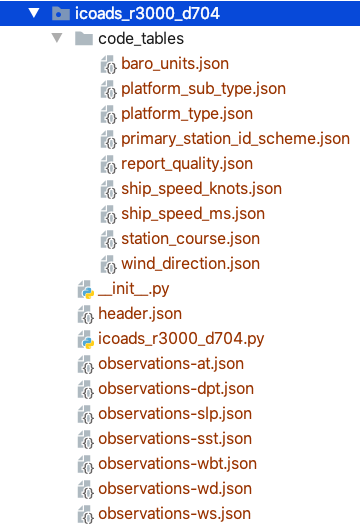

In [10]:
from IPython.display import Image
Image(filename='/Users/brivas/c3s_work/figures/cdm_704.png')

In the [icoads_r300_d704.py](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/blob/deck704v0/lib/mappings/icoads_r3000_d704/icoads_r3000_d704.py) file we will write all the functions needed to convert variables to the right units and/or specifications according with the [CDM documentation](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/blob/master/docs/cdm_latest.pdf)

To run the data model we need three things:

- raw data (the data we just read above)
- attributes of the raw data (sections and column names)
- the name of the model

> Note that the model and all necessary files should be already stored in the `cdm-mapper/lib/mappings` directory before you run anything!

In [11]:
attributes = data_raw.atts.copy()
name_of_model = 'icoads_r3000_d704'

cdm_dict = cdm.map_model(name_of_model, data_raw.data, attributes, cdm_subset = None, log_level = 'INFO')

/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


Now, have we succeeded in writing some of the data to the CDM format?

We were looking to write the following data 

### Header section

 - Platform type and sub type
 - primary station id: original ship names
 - Longitude and Latitudes: converted from Degrees Minutes and Hemisphere to Decimal degrees
 - Location accuracy
 
 
### Observations tables

- `Observations-at`: latitude, longitude and location precision
- `Observations-dpt`: latitude, longitude and location precision
- `Observations-slp`: latitude, longitude and location precision
     - z_coordinate_type: Barometer height in feet converted to m.
     - original units: written in the CDM code format

- `Observations-sst`: latitude, longitude and location precision
- `Observations-wbt`: latitude, longitude and location precision
- `Observations-wd`: latitude, longitude and location precision
- `Observations-ws`: latitude, longitude and location precision


In [12]:
data = cdm_dict['header']['data']
data

,report_id,application_area,observing_programme,report_type,station_type,platform_type,platform_sub_type,primary_station_id,station_record_number,primary_station_id_scheme,longitude,latitude,location_accuracy,location_quality,crs,station_speed,station_course,height_of_station_above_local_ground,height_of_station_above_sea_level,report_meaning_of_timestamp,report_timestamp,report_duration,report_time_accuracy,report_time_quality,report_quality,duplicate_status,record_timestamp,history,source_id,source_record_id
0,ICOADS-30-020N16,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 06:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N16
1,ICOADS-30-020N1P,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 08:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N1P
2,ICOADS-30-020N25,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 10:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N25
3,ICOADS-30-020N2Q,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 12:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N2Q
4,ICOADS-30-020N3A,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 14:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N3A
5,ICOADS-30-020N41,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.50,42.33,2.0,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 16:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N41
6,ICOADS-30-020N4A,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,105,Emma,1,8.0,NaN,40.40,2.0,3,0,1.02888,135.0,0.0,0.0,2,1878-10-20 17:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N4A
7,ICOADS-30-020N4K,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.50,42.33,NaN,3,0,5.65884,90.0,0.0,0.0,2,1878-10-20 18:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N4K
8,ICOADS-30-020N4U,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,105,Emma,1,8.0,NaN,40.40,NaN,3,0,4.11552,135.0,0.0,0.0,2,1878-10-20 19:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N4U
9,ICOADS-30-020N4Y,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,105,Emma C.Litchfield,1,8.0,-81.05,31.33,NaN,3,0,NaN,135.0,0.0,0.0,2,1878-10-20 19:00:00,11,3600.0,2,0,4,2021-01-26 14:55:58.536116,2021-01-26 14:55:58. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N4Y


We now show an example of Lat and Lon

In [13]:
data.latitude.head(), data.longitude.head()

(0    42.33
 1    42.33
 2    42.33
 3    42.33
 4    42.33
 Name: latitude, dtype: float64,
 0   -66.5
 1   -66.5
 2   -66.5
 3   -66.5
 4   -66.5
 Name: longitude, dtype: float64)

In [14]:
data_raw.data.c99_daily[['lat_deg_on','lat_min_on','lat_hemis_on', 'lon_deg_of', 'lon_min_of', 'lon_hemis_of']].head()

,lat_deg_on,lat_min_on,lat_hemis_on,lon_deg_of,lon_min_of,lon_hemis_of
0,42,20,N,66,30,W
1,42,20,N,66,30,W
2,42,20,N,66,30,W
3,42,20,N,66,30,W
4,42,20,N,66,30,W


This has been succesfully converted to Decimal degrees with the right (-) for each hemisphere. 


Now for the SLP we have other information:

In [15]:
data_raw.data.c99_journal[['baro_type', 'baro_height', 'baro_units']].head()

,baro_type,baro_height,baro_units
0,2,14,1
1,2,14,1
2,2,14,1
3,2,14,1
4,2,14,1


Baro type original code table

```
{
	"1":"aneroid",
	"2":"mercurial"
}
```
Baro units original code table. It has been left like this:

```
{
	"1":"inches",
	"2":"millimeters",
	"3":"millibars",
	"4":"unable to determine",
	"5":"Paris inches"
}
```

Our CDM table will be
```
{
  "1":1001,
  "2":1002,
  "3":1003,
  "4":9999,
  "5":1005
}
```

9999 will be the `"fill_value": 9999` that indicates to the CDM-mapper that these are NaN values.


In [16]:
data_obs = cdm_dict['observations-slp']['data']
data_obs

,observation_id,report_id,data_policy_licence,date_time,date_time_meaning,observation_duration,longitude,latitude,crs,z_coordinate_type,observed_variable,observation_value,value_significance,units,conversion_flag,location_precision,spatial_representativeness,quality_flag,numerical_precision,sensor_automation_status,exposure_of_sensor,original_precision,original_units,original_value,conversion_method,processing_level,traceability,advanced_qc,advanced_uncertainty,advanced_homogenisation,source_id
0,ICOADS-30-020N16-SLP,ICOADS-30-020N16,0,1878-10-20 06:00:00,2,8,-66.50,42.33,0,4.267252,58,99610.000000,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,996.1,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
1,ICOADS-30-020N1P-SLP,ICOADS-30-020N1P,0,1878-10-20 08:00:00,2,8,-66.50,42.33,0,4.267252,58,99630.000000,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,996.3,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
2,ICOADS-30-020N25-SLP,ICOADS-30-020N25,0,1878-10-20 10:00:00,2,8,-66.50,42.33,0,4.267252,58,99690.000000,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,996.9,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
3,ICOADS-30-020N2Q-SLP,ICOADS-30-020N2Q,0,1878-10-20 12:00:00,2,8,-66.50,42.33,0,4.267252,58,99760.000000,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,997.6,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
4,ICOADS-30-020N3A-SLP,ICOADS-30-020N3A,0,1878-10-20 14:00:00,2,8,-66.50,42.33,0,4.267252,58,99920.000000,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,999.2,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
5,ICOADS-30-020N41-SLP,ICOADS-30-020N41,0,1878-10-20 16:00:00,2,8,-66.50,42.33,0,4.267252,58,100020.000000,2,32,0,2.0,3,2,NaN,5,3,NaN,1001,1000.2,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
6,ICOADS-30-020N4A-SLP,ICOADS-30-020N4A,0,1878-10-20 17:00:00,2,8,NaN,40.40,0,3.048037,58,101150.000000,2,32,0,2.0,3,2,NaN,5,3,NaN,1001,1011.5,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
7,ICOADS-30-020N4K-SLP,ICOADS-30-020N4K,0,1878-10-20 18:00:00,2,8,-66.50,42.33,0,4.267252,58,100110.000000,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,1001.1,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
8,ICOADS-30-020N4U-SLP,ICOADS-30-020N4U,0,1878-10-20 19:00:00,2,8,NaN,40.40,0,3.048037,58,101150.000000,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,1011.5,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
9,ICOADS-30-020N55-SLP,ICOADS-30-020N55,0,1878-10-20 20:00:00,2,8,-66.50,42.33,0,4.267252,58,100180.000000,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,1001.8,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
